# Functions in nltk

In [53]:
from nltk import *

In [55]:
import nltk
from nltk import word_tokenize

## writing structured programs

#### assignment

In [2]:
# the "value" of a structured object such as a list is actually just a reference to the object.
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

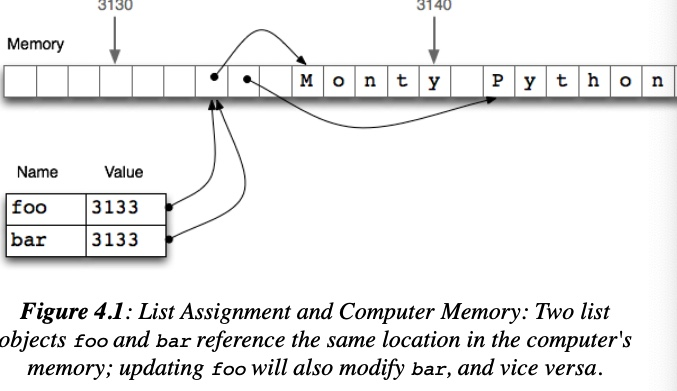

In [3]:
# The is operator tests for object identity, they are not only identical according to ==, but also that they are one and the same object
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [4]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [5]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [6]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [7]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [8]:
[id(snake) for snake in snake_nest]

[4373149640, 4373149640, 4373149640, 4371804360, 4373149640]

In [11]:
#  all() and any() can be applied to a list (or other sequence) to check whether all or any items meet some condition
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [12]:
any(len(w) > 4 for w in sent)

True

#### sequence

In [25]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [24]:
# it is the comma, not the parentheses, that define the tuple
tSingle = 'run',
tSingle

('run',)

In [29]:
[i for i in reversed(t)]

[3, 'fem', 'walk']

In [34]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
fdist


FreqDist({'lorry': 4, ',': 3, 'yellow': 2, 'Red': 1, 'red': 1, '.': 1})

In [35]:
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [36]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [37]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [38]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [39]:
# For some NLP tasks it is necessary to cut up a sequence into two or more parts. For instance, we might want to "train" a system on 90% of the data and test it on the remaining 10%. 
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [40]:
len(training_data) / len(test_data)

9.0

In [45]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
# The underscore _ is just a regular Python variable, but we can use underscore by convention to indicate that we will not use its value
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [43]:
wordlens

[(1, 'I'), (3, 'off'), (3, 'the'), (6, 'turned'), (12, 'spectroroute')]

In [47]:
text = 'this is a test'
max([w.lower() for w in word_tokenize(text)])

'this'

In [48]:
# Python allows us to omit the bracket
## generator expression ： more efficient
# process the stream of data without having to store anything more than the maximum value seen so far
max(w.lower() for w in word_tokenize(text))

'this'

In [52]:
tokens = nltk.corpus.brown.words(categories='news')
# generator expression
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


In [53]:
word_list = []
word_list.insert(0, tokens[1])

In [54]:
word_list

['Fulton']

In [43]:
str(123)

'123'

In [1]:
# python built-in module pretty print
import pprint
m, n = 3, 7
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


In [2]:
print(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}], [{7}, {7}, {7}, {7}, {7}, {7}, {7}], [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


#### generaor expression

In [ ]:
# 1
max([w.lower() for w in word_tokenize(text)])
# vs
# 3
max(w.lower() for w in word_tokenize(text))


In [ ]:
# The second line uses a generator expression. This is more than a notational convenience: in many language processing situations, generator expressions will be more efficient. In [1], storage for the list object must be allocated before the value of max() is computed. If the text is very large, this could be slow. In [2], the data is streamed to the calling function. Since the calling function simply has to find the maximum value — the word which comes latest in lexicographic sort order — it can process the stream of data without having to store anything more than the maximum value seen so far.

### Functions: The Foundation of Structured Programming

In [3]:
## In general, functions should modify the contents of a parameter, or return a value, not both.
def sort1(mylist):
    mylist.sort() # ok
def sort2(mylist):
    return sorted(mylist) # ok
def sort3(mylist):
    mylist.sort()
    return mylist # ko

In [39]:
l = [1,3,2]

In [40]:
## 
sort1(l)

In [41]:
l

[1, 2, 3]

In [35]:
sort2(l)

[1, 2, 3]

In [36]:
l

[1, 3, 2]

In [37]:
sort3(l)

[1, 2, 3]

In [38]:
l

[1, 2, 3]

In [43]:
test = [2,4,1]
test.sort()

In [44]:
test

[1, 2, 4]

In [45]:
## parameter passing
# 2 parameters modified inside the function
def set_up(word, properties):
     word = 'lolcat'
     properties.append('noun')
     properties = 5
        
# call function
w = ''
p = []
set_up(w,p)
w

''

In [46]:
# w is unchanged, p is changed
p

['noun']

In [47]:
word = w
word = 'lolcat'
w

''

In [48]:
# Function definitions create a new, local scope for variables. When you assign to a new variable inside the body of a function, the name is only defined within that function. The name is not visible outside the function, or in other functions.
propertites

NameError: name 'propertites' is not defined

In [49]:
# LGB rule of name resolution
# When you refer to an existing name from within the body of a function, the Python interpreter first tries to resolve the name with respect to the names that are 
# local => global => built-in

## avoid using global declaration as much as possible

In [57]:
# Functional Decomposition
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [58]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', ':1', ':', 'the', '{', '}', ';', 'of', '(', ')', "'", 'archives', '#', 'and', '.', '[', ']', '``', 'national', 'a', 'documents', 'founding', 'to', 'declaration', 'constitution', 'for', 'color', 'ffffff', 'visit']


In [59]:
def freq_words2(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

freq_words2(constitution, 30)

["''",
 ',',
 ':1',
 ':',
 'the',
 '{',
 '}',
 ';',
 'of',
 '(',
 ')',
 "'",
 'archives',
 '#',
 'and',
 '.',
 '[',
 ']',
 '``',
 'national',
 'a',
 'documents',
 'founding',
 'to',
 'declaration',
 'constitution',
 'for',
 'color',
 'ffffff',
 'visit']

#### functions as arguments

In [60]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the','sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
     return [prop(word) for word in sent]

In [61]:
# pass len() function 
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [62]:
def last_letter(word):
     return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [63]:
# Python provides us with one more way to define functions as arguments to other functions, so-called 
# lambda expressions
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [87]:
# cmp() n'existe plus in python 3
def cmp(a, b):
    return (a > b) - (a < b) 
sorted(sent,  key = lambda a, b : cmp(len(a), len(b)))
##          ^^^^

TypeError: <lambda>() missing 1 required positional argument: 'b'

In [82]:
cmp(3,3)

0

#### accumulative functions

In [88]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result
## The function search2() is a generator. The first time this function is called, it gets as far as the yield statement and pauses. The calling program gets the first word and does any necessary processing. Once the calling program is ready for another word, execution of the function is continued from where it stopped, until the next time it encounters a yield statement. This approach is typically more efficient, as the function only generates the data as it is required by the calling program, and does not need to allocate additional memory to store the output
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [89]:
for item in search1('zz', nltk.corpus.brown.words()):
     print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [90]:
for item in search2('zz', nltk.corpus.brown.words()):
     print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [92]:
# recursion technique
# Return sends a specified value back to its caller whereas Yield can produce a sequence of values. We should use yield when we want to iterate over a sequence, but don’t want to store the entire sequence in memory. Yield are used in Python generators

Yield are used in Python generators. 
def permutations(seq):
     if len(seq) <= 1:
         yield seq
     else:
         for perm in permutations(seq[1:]):
             for i in range(len(perm)+1):
                 yield perm[:i] + seq[0:1] + perm[i:]
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

#### Higher-Order Functions


In [97]:
def is_content_word(word):
     return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']   

# filter(), applies the function to each otem in the sequence contained in its second parameter
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [98]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [101]:
# map(), which applies a function to every item in a sequence.
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
list(map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent))

SyntaxError: unexpected EOF while parsing (<ipython-input-101-bf59b85a3d0f>, line 3)

In [102]:
[len(c for c in w if c.lower() in "aeiou") for w in sent]

TypeError: object of type 'generator' has no len()

#### Named Arguments

In [103]:
# keyword arguments
def repeat(msg='<empty>', num=1):
     return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [104]:
repeat(msg='Alice')

'Alice'

In [105]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [106]:
# We can define a function that takes an arbitrary number of unnamed and named parameters, and access them via an in-place list of arguments *args and an "in-place dictionary" of keyword arguments **kwargs. 
def generic(*args, **kwargs):
     print(args)
     print(kwargs)
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [107]:
song = [['four', 'calling', 'birds'],
         ['three', 'French', 'hens'],
         ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [108]:
# *args appears as a function parameter, it actually corresponds to all the unnamed parameters of the function.
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [111]:
def freq_words(file, min=1, num=10):
     text = open(file).read()
     tokens = word_tokenize(text)
     freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
     return freqdist.most_common(num)
fw = freq_words('corpus.txt', 4, 10)
fw1 = freq_words('corpus.txt', min=4, num=10)
fw2 = freq_words('corpus.txt', num=10, min=4)

In [112]:
fw

[('questions', 3),
 ('this', 2),
 ('question', 2),
 ('words', 2),
 ('will', 2),
 ('test', 1),
 ('file', 1),
 ('fine', 1),
 ('There', 1),
 ('main', 1)]

In [113]:
fw1

[('questions', 3),
 ('this', 2),
 ('question', 2),
 ('words', 2),
 ('will', 2),
 ('test', 1),
 ('file', 1),
 ('fine', 1),
 ('There', 1),
 ('main', 1)]

In [115]:
# Flag variable is used as a signal in programming to let the program know that a certain condition has met. It usually acts as a boolean variable indicating a condition to be either true or false.

def freq_words(file, min=1, num=10, verbose=False):
     freqdist = FreqDist()
     if verbose: print("Opening", file)
     text = open(file).read()
     if verbose: print("Read in %d characters" % len(file))
     for word in word_tokenize(text):
         if len(word) >= min:
             freqdist[word] += 1
             if verbose and freqdist.N() % 100 == 0: print(".", sep="")
     if verbose: print
     return freqdist.most_common(num)

## Program Development

#### Module

In [117]:
nltk.corpus.__file__

'/anaconda3/lib/python3.7/site-packages/nltk/corpus/__init__.py'

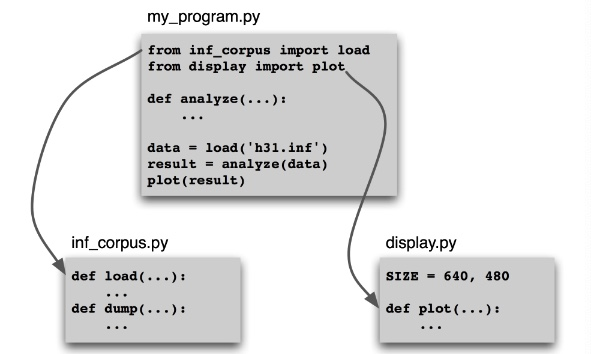

In [118]:
# result[] Each time we call find_words() with no third parameter, the result will simply extend the result of the previous call, rather than start with the empty result list as specified in the function definition.
def find_words(text, wordlength, result=[]):
     for word in text:
         if len(word) == wordlength:
             result.append(word)
     return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)


['omg', 'teh', 'teh', 'mat']

In [119]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])


['ur', 'on']

In [120]:
# Each time we call find_words() with no third parameter, the result will simply extend the result of the previous call, rather than start with the empty result list as specified in the function definition.
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)


['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

#### debugging techiniques

In [ ]:
import pdb
import mymodule
pdb.run('mymodule.myfunction()')

In [122]:
# quit to quit
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) step
--Call--
> <ipython-input-118-5beacccfa083>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']
(Pdb) 
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']
(Pdb) 
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']
--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--
(Pdb) result
['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']
(Pdb) xx
*** NameError: name 'xx' is not defined
(Pdb) stop
*** NameError: name 'stop' is not defined
(Pdb) quit


## recursion

In [123]:
# we have a set of n words, and want to calculate how many different ways they can be combined to make a sequence of words
def factorial1(n):
     result = 1
     for i in range(n):
         result *= (i+1)
     return result

In [124]:
# 2
def factorial2(n):
     if n == 1:
         return 1
     else:
         return n * factorial2(n-1)

In [125]:
def size1(s):
     return 1 + sum(size1(child) for child in s.hyponyms())

In [129]:
def size2(s):
     layer = [s]
     total = 0
     while layer:
         total += len(layer)
         layer = [h for c in layer for h in c.hyponyms()] 
     return total

In [130]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [131]:
size2(dog)

190

In [132]:
# A letter trie is a data structure that can be used for indexing a lexicon, one letter at a time.
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [133]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing

In [134]:
trie

{'c': {'h': {'a': {'t': {'value': 'cat'}, 'i': {'r': {'value': 'flesh'}}},
   'i': {'e': {'n': {'value': 'dog'}}, 'c': {'value': 'stylish'}}}}}

In [135]:
trie['c']['h']['a']['t']['value']

'cat'

In [137]:
import pprint
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


#### Space-Time Tradeoffs

In [139]:
# We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index.
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " toda

#### Dynamic Programming

In [144]:
# Dynamic programming is used when a problem contains overlapping sub-problems. Instead of computing solutions to these sub-problems repeatedly, we simply store them in a lookup table. 

In [145]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

In [143]:
# bottom-up approach to dynamic programming. Unfortunately it turns out to be quite wasteful for some applications, since it may compute solutions to sub-problems that are never required for solving the main problem. 

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

In [142]:
# top-down approach to dynamic programming, which is recursive. It avoids the huge wastage of virahanka1() by checking whether it has previously stored the result.
def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

In [146]:
# in virahanka4(), use a Python "decorator" called memoize, which takes care of the housekeeping work done by virahanka3() without cluttering up the program. This "memoization" process stores the result of each previous call to the function along with the parameters that were used.
from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [147]:
virahanka4(3)

['SSS', 'SL', 'LS']